In [30]:
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import csv
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
driver=webdriver.Chrome()
driver.get('https://www.thantai1.net/so-ket-qua')

In [9]:
file=open('lode.csv', mode='w',encoding="utf-8")

In [12]:
def save_data():
    
    extend_field=driver.find_element(By.XPATH,'//*[@id="skq"]/form/div[2]/div/button[9]')
    extend_field.send_keys(Keys.ENTER)
    time.sleep(3)
    date_field=driver.find_element(By.XPATH,'//*[@id="end"]')
    date_field.send_keys()
    soup= BeautifulSoup(driver.page_source)
    list_table=soup.find_all('table', class_="table table-bordered table-striped table-sm")
    for table in list_table:
        list_giai=table.find_all("tr")
        for giai_id, giai in enumerate(list_giai):
            if  giai_id==9 or giai_id==0:
                continue
            row = giai.text.strip()
            row=process(row)
            row = row
            file.write(row)
   

In [13]:
s=''
def process(s):
    if 'Đặc biệtĐB' in s:
        return s[-2:]
    elif 'Giải nhấtG1' in s :
        return s[-2:]
    elif 'Giải nhìG2' in s :
        s=s.replace('Giải nhìG2', '')
        s1=s[3:5]
        s2=s[-2:]
        s=s1+s2
        return s
    elif 'Giải baG3' in s :
        s=s.replace('Giải baG3', '')
        s1=''
        for i in range(3,len(s),5):
            s1=s1+s[i]+s[i+1]
        return s1
    elif 'Giải tưG4' in s :
        s=s.replace('Giải tưG4', '')
        s1=''
        for i in range(2,len(s),4):
            s1=s1+s[i]+s[i+1]
        return s1
    elif 'Giải nămG5' in s :
        s=s.replace('Giải nămG5', '')
        s1=''
        for i in range(2,len(s),4):
            s1=s1+s[i]+s[i+1]
        return s1
    elif 'Giải sáuG6' in s :
        s=s.replace('Giải sáuG6', '')
        s1=''
        for i in range(1,len(s),3):
            s1=s1+s[i]+s[i+1]
        return s1
    elif 'Giải bảyG7' in s :
        s=s.replace('Giải bảyG7', '')
        s1=''
        for i in range(0,len(s),2):
            s1=s1+s[i]+s[i+1]
        return s1


In [19]:


today=date(2024,5,30)
#today=today-timedelta(days=300)
#
for i in range (3):
    save_data()
    time.sleep(5)
    date_field=driver.find_element(By.XPATH,'//*[@id="end"]')
    date_field.clear()
    date_field.send_keys(today.strftime("%d/%m/%Y"))
    today=today-timedelta(days=300)
    time.sleep(2)
    date_field.send_keys(Keys.ENTER)

In [28]:
with open('lode.csv', 'r') as file:
    noi_dung = file.read()
statis={}
for i in range(0,len(noi_dung),2):
    s=(noi_dung[i]+noi_dung[i+1])
    if s in statis:
        temp=statis[s]
        temp=temp+1
        statis[s]=temp
    else:
        statis[s]=1

<BarContainer object of 100 artists>

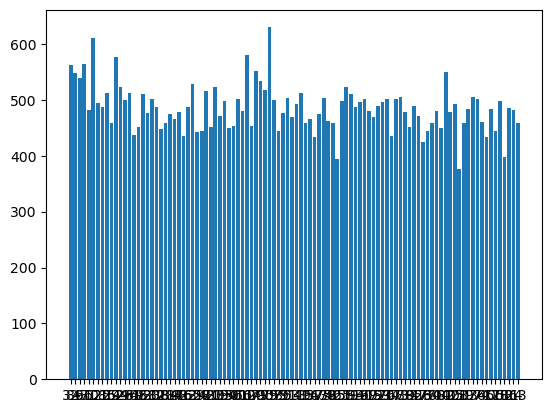

In [34]:
fig,ax= plt.subplots()
ax.bar(statis.keys(),statis.values())

In [39]:
statis['99']

496